In [52]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [53]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [54]:
SuperStore_db = pd.read_csv('/Users/enzowurtele/Desktop/DATABASES/Sample-Superstore.csv', encoding='latin1')

In [67]:
X = SuperStore_db[['Discount', 'Profit']].values

For n_clusters = 2 The average silhouetter_score is:  0.9725215547005468
For n_clusters = 3 The average silhouetter_score is:  0.9684002068061746
For n_clusters = 4 The average silhouetter_score is:  0.9230659879108082
For n_clusters = 5 The average silhouetter_score is:  0.8343674472008682
For n_clusters = 6 The average silhouetter_score is:  0.8485448254607864
For n_clusters = 7 The average silhouetter_score is:  0.791584107919701


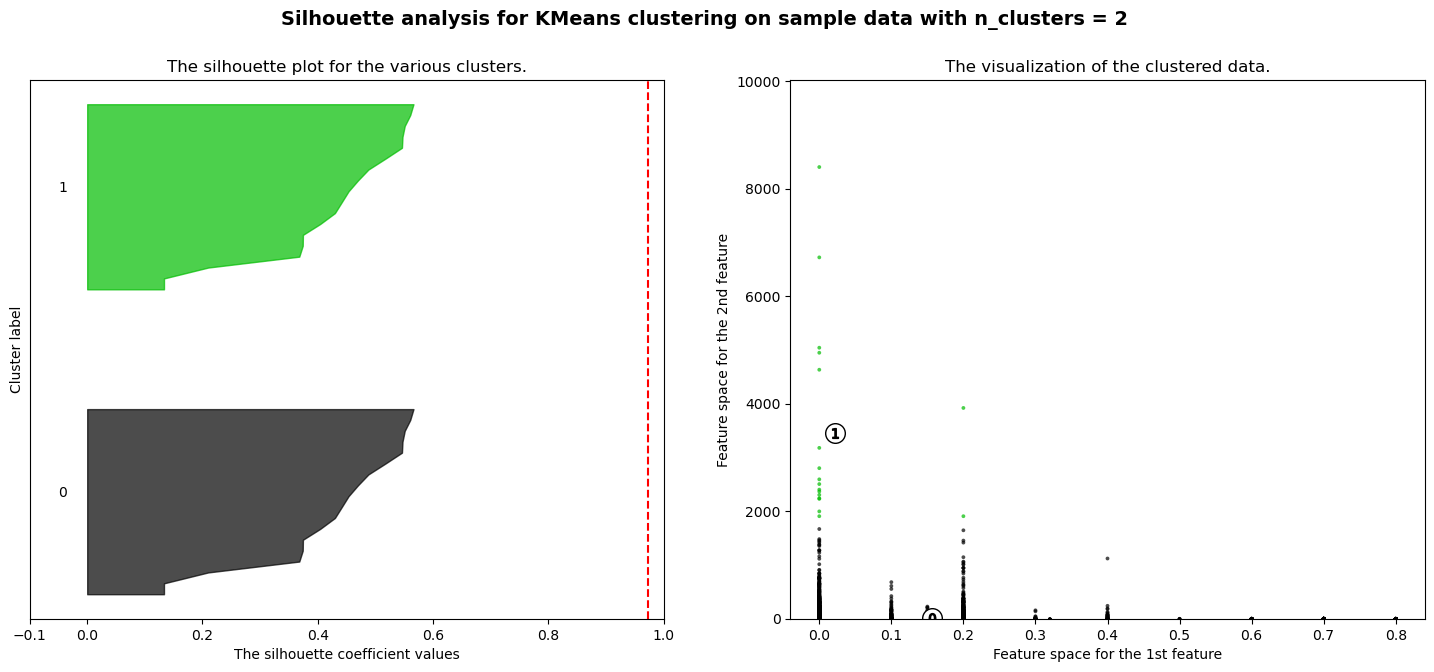

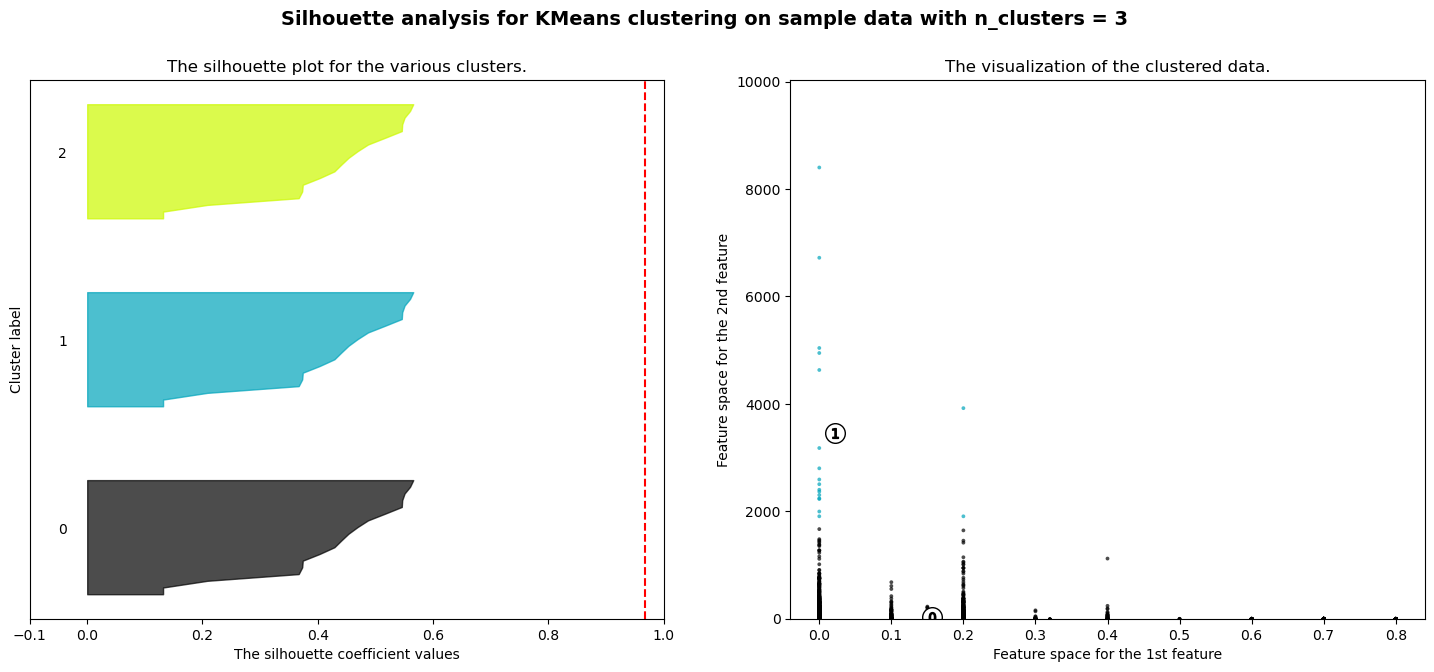

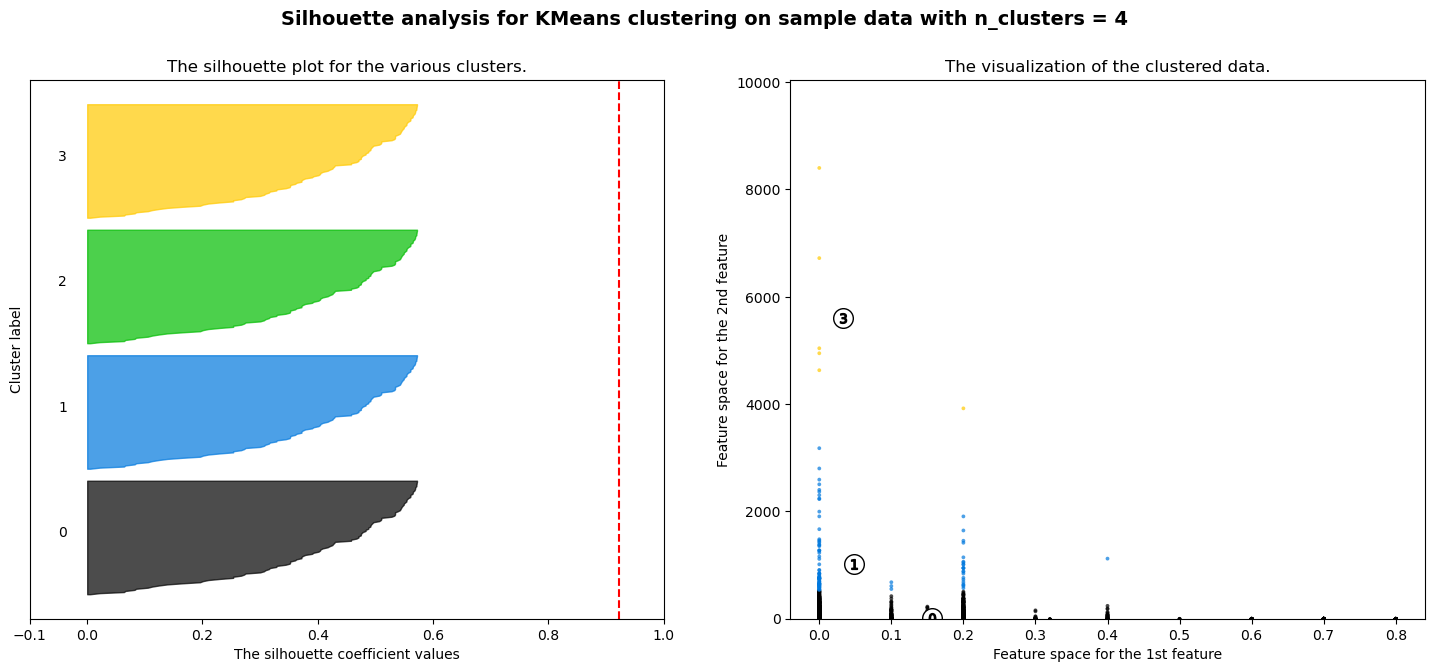

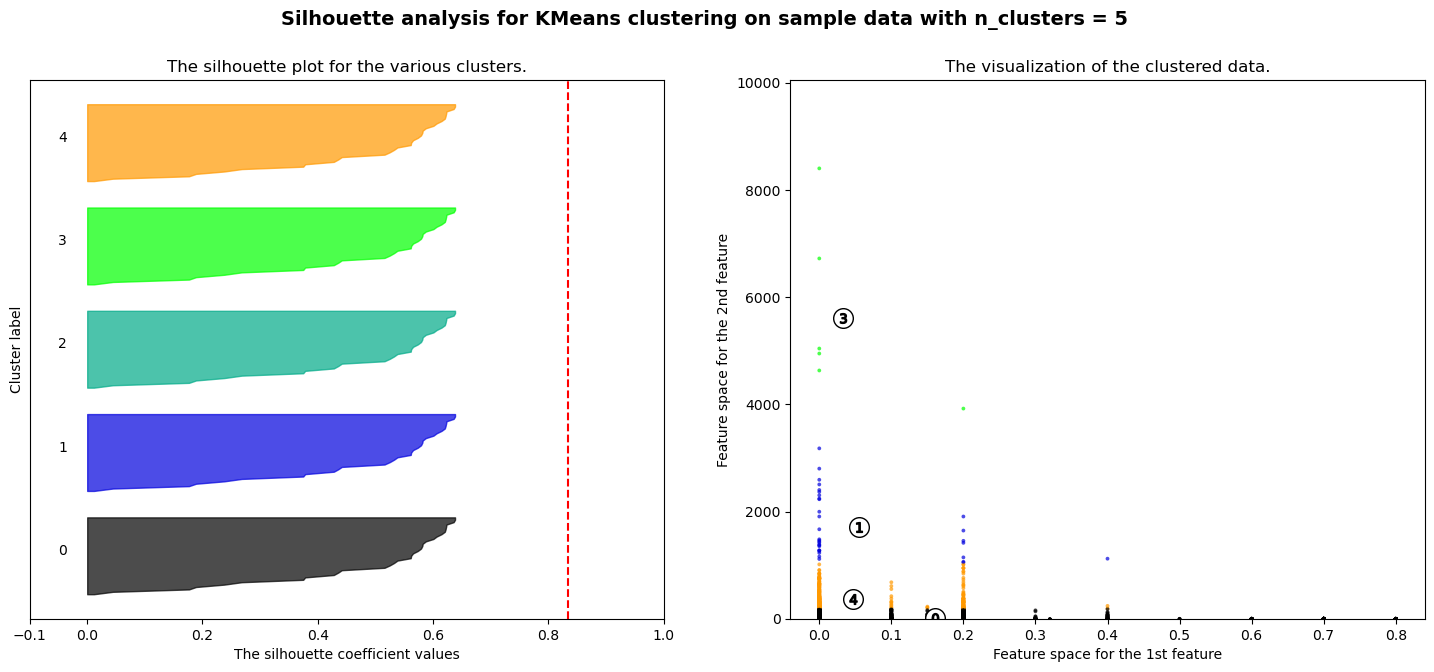

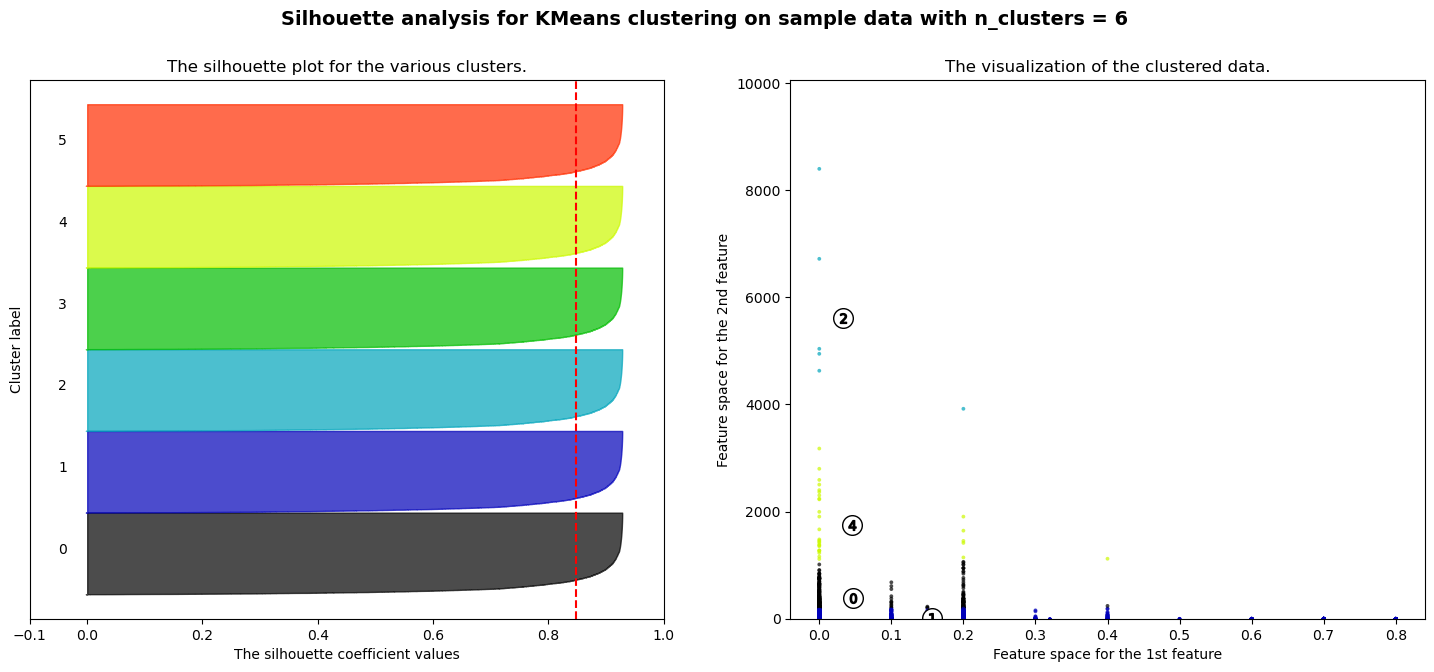

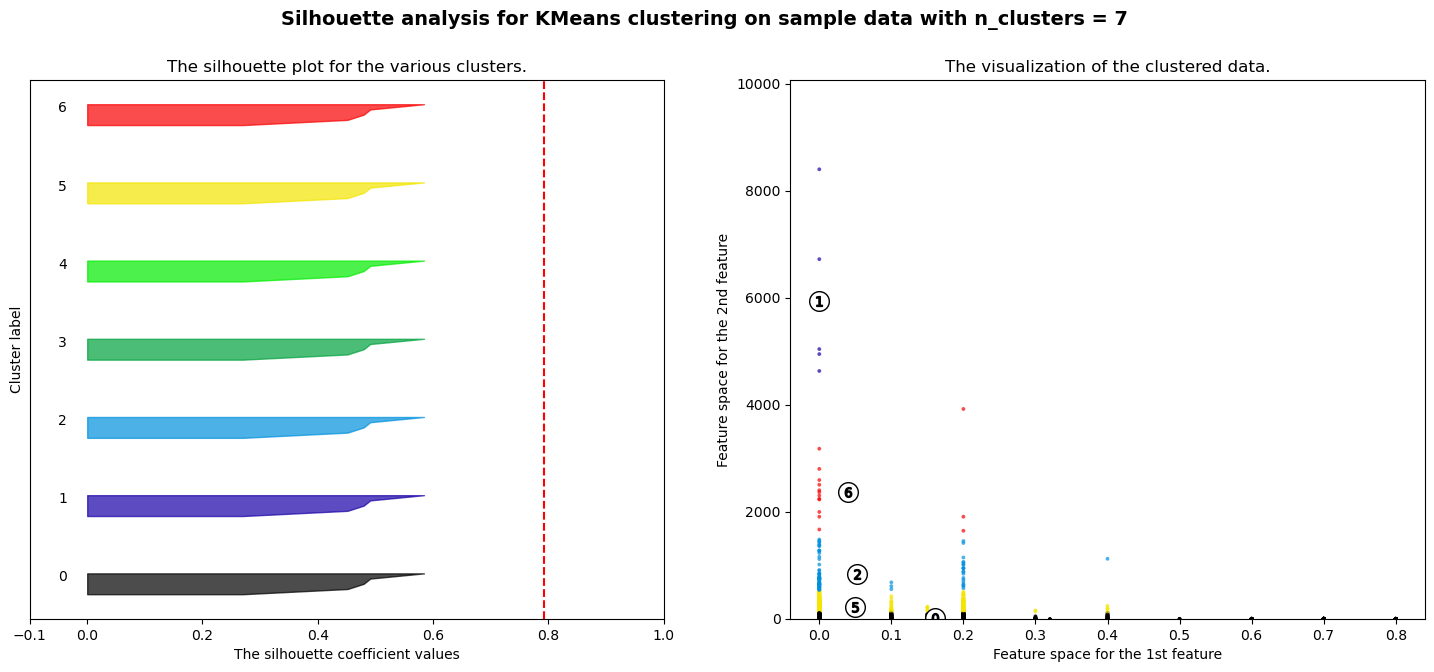

In [68]:
range_n_clusters = [2,3,4,5,6,7]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    ax1.set_xlim([-0.1, 1])
    ax2.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg =silhouette_score(X,cluster_labels)
    print(
        'For n_clusters =',
        n_clusters,
        'The average silhouetter_score is: ',
        silhouette_avg,
    ) 

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == 1]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



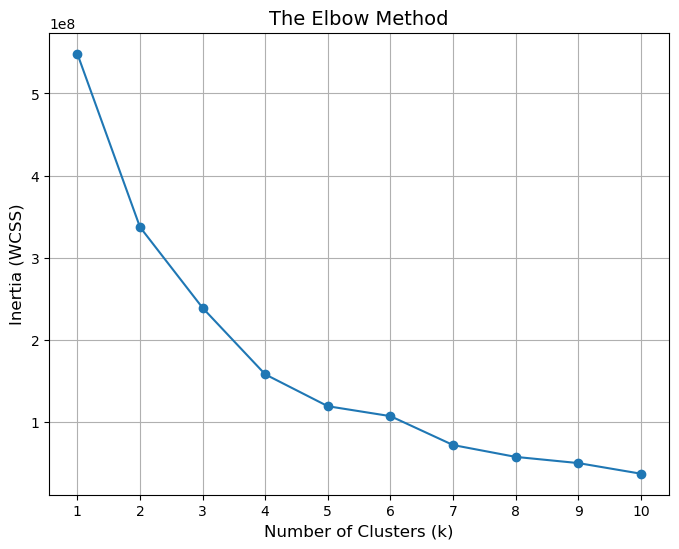

In [57]:
range_n_clusters = range(1, 11)  # Try 1 to 10 clusters
inertia = []  # To store WCSS values

# Calculate inertia for each number of clusters
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("The Elbow Method", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia (WCSS)", fontsize=12)
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()
